# Installing Necessary Libraries


In [78]:
!pip install -r '/content/drive/MyDrive/SSGANS/requirements.txt'

In [1]:
import platform
print(platform.python_version())

3.10.12



# Loading The Data

In [2]:
import pandas as pd

# Load the CSV data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/SSGANS/startup data.csv')
data = df


# Creating the Metadata Necessary for Synthesizing Data  

In [3]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [4]:
metadata.detect_from_csv(filepath='/content/drive/MyDrive/SSGANS/startup data.csv')

In [5]:
python_dict = metadata.to_dict()

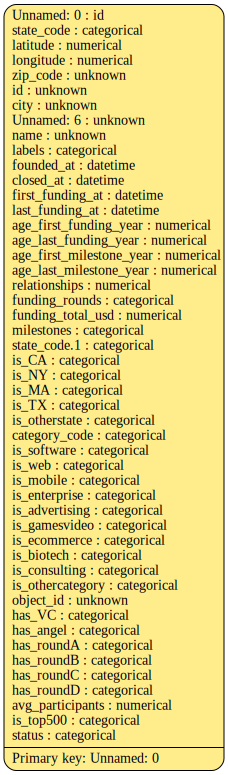

In [6]:
metadata.visualize()

In [7]:
metadata.validate()

# Saving the Metadata in a JSON File

In [10]:
metadata.save_to_json(filepath='/content/drive/MyDrive/SSGANS/my_metadata_v9.json')

In [11]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata.load_from_json(
    filepath='/content/drive/MyDrive/SSGANS/my_metadata_v9.json')

# Constructing a CTGANSynthesizer


In [8]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=500,
    verbose=True
)


In [9]:
synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': False,
 'locales': None,
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': True,
 'epochs': 500,
 'pac': 10,
 'cuda': True}

In [10]:
{
    'enforce_rounding': False,
    'epochs': 500,
    'verbose': True
}

{'enforce_rounding': False, 'epochs': 500, 'verbose': True}

In [11]:
metadata = synthesizer.get_metadata()

# Training the Synthesizer

In [12]:
synthesizer.fit(data)

Gen. (-0.33) | Discrim. (-0.02): 100%|██████████| 500/500 [01:01<00:00,  8.18it/s]


# Saving the Trained GAN into a Pickle File

In [13]:
synthesizer.save(
    filepath='/content/drive/MyDrive/SSGANS/my_synthesizer(2).pkl'
)

# Generating Synthetic Data

In [34]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer.load(
    filepath='/content/drive/MyDrive/SSGANS/my_synthesizer(2).pkl')

In [46]:
synthetic_data = synthesizer.sample(num_rows=1000)

# Saving the Data as CSV File

In [47]:
synthetic_data.to_csv('/content/drive/MyDrive/SSGANS/synthetic_data11.csv', index=True)

# Evaluating the Generated Synthetic Data

In [48]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 1176/1176 [00:15<00:00, 74.97it/s]

Overall Quality Score: 84.23%

Properties:
- Column Shapes: 87.3%
- Column Pair Trends: 81.17%


# KSComplement
This metric computes the similarity of a real column vs. a synthetic column in terms of the column shapes -- aka the marginal distribution or 1D histogram of the column.
## Score
(best) 1.0: The real data is exactly the same as the synthetic data

---


(worst) 0.0: The real and synthetic data are as different as they can be

In [49]:
from sdmetrics.single_column import KSComplement

KSComplement.compute(
    real_data=data['avg_participants'],
    synthetic_data=synthetic_data['avg_participants']
)

0.7315254604550379

In [50]:
from sdmetrics.reports import utils

fig = utils.get_column_plot(
    real_data=data,
    synthetic_data=synthetic_data,
    column_name='avg_participants',
    metadata=python_dict
)

fig.show()

In [51]:
quality_report.get_visualization('Column Shapes')

In [52]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=synthetic_data,
    column_name='status',
    metadata=metadata
)

fig.show()

# Missing Value Similarity
This metric compares whether the synthetic data has the same proportion of missing values as the real data for a given column.
## Score
(best) 1.0: The synthetic data perfectly captures the proportion of missing values

---


(worst) 0.0: The synthetic data has a completely different proportion of missing values than the real data

In [53]:
from sdmetrics.single_column import MissingValueSimilarity

MissingValueSimilarity.compute(
    real_data=data['labels'],
    synthetic_data=synthetic_data['labels']
)

1.0

# StatisticSimilarity
This metric measures the similarity between a real column and a synthetic column by comparing a summary statistic. Supported summary statistics are: mean, median and standard deviation.

## Score
(best) 1.0: The statistic for the real data is exactly the same at the synthetic data

---


(worst) 0.0: The statistic for the real data is extremely different from the synthetic data

In [54]:
from sdmetrics.single_column import StatisticSimilarity

StatisticSimilarity.compute(
    real_data=data['labels'],
    synthetic_data=synthetic_data['labels'],
    statistic='mean'
)

0.8878039003250271

# TVComplement
This metric computes the similarity of a real column vs. a synthetic column in terms of the column shapes -- aka the marginal distribution or 1D histogram of the column.

## Score
(best) 1.0: The real data is exactly the same as the synthetic data

---


(worst) 0.0: The real and synthetic data are as different as they can be

In [55]:
from sdmetrics.single_column import TVComplement

TVComplement.compute(
    real_data=data['state_code'],
    synthetic_data=synthetic_data['state_code'],
)

0.9193066088840737


# Visualizing the Synthetic Data

In [66]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=data,
    synthetic_data=synthetic_data,
    column_names=['labels', 'category_code'],
    metadata=metadata
)

fig.show()

In [62]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=data,
    synthetic_data=synthetic_data,
    column_names=['age_first_funding_year', 'age_last_funding_year'],
    metadata=metadata
)

fig.show()